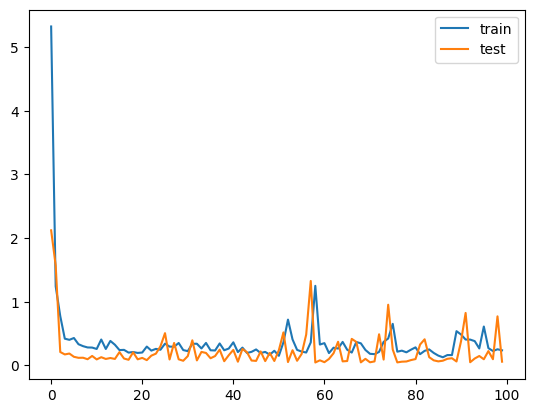

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9399 - loss: 0.1409 
Accuracy: 95.96


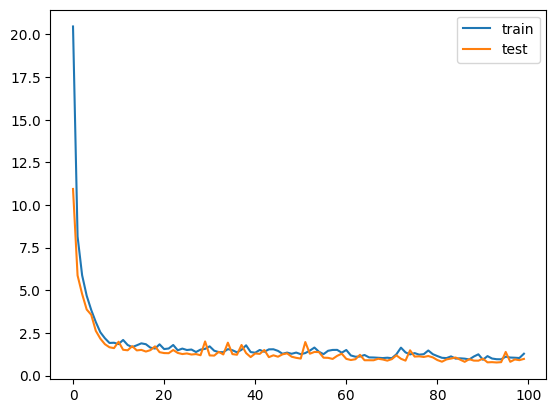

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[0.5643044710159302, 0.7427821755409241, 0.8582677245140076, 0.8923884630203247, 0.8608924150466919, 0.8818897604942322, 0.9055117964744568, 0.8976377844810486, 0.8845144510269165, 0.874015748500824, 0.8950130939483643, 0.8372703194618225, 0.8713910579681396, 0.9028871655464172, 0.8661417365074158, 0.8320209980010986, 0.8845144510269165, 0.887139081954956, 0.8923884630203247, 0.8293963074684143, 0.887139081954956, 0.8661417365074158, 0.8635170459747314, 0.9081364870071411, 0.8845144510269165, 0.887139081954956, 0.8766404390335083, 0.9081364870071411, 0.8766404390335083, 0.8582677245140076, 0.8451443314552307, 0.887139081954956, 0.9186351895332336, 0.9028871655464172, 0.8530183434486389, 0.8845144510269165, 0.9055117964744568, 0.8556430339813232, 0.808398962020874, 0.8897637724876404, 0.9002624750137329, 0.8766404390335083, 0.8897637724876404, 0.874015748500824, 0.8661417365074158, 0.8635170459747314, 0.9107611775398254, 0.8976

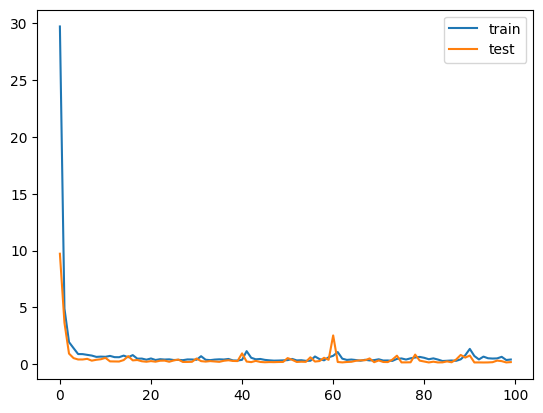

[0.4488188922405243, 0.6587926745414734, 0.7926509380340576, 0.7979002594947815, 0.8818897604942322, 0.8923884630203247, 0.8792650699615479, 0.8792650699615479, 0.8950130939483643, 0.8792650699615479, 0.8897637724876404, 0.8582677245140076, 0.8766404390335083, 0.8713910579681396, 0.847769021987915, 0.9002624750137329, 0.8530183434486389, 0.9002624750137329, 0.8950130939483643, 0.9186351895332336, 0.8792650699615479, 0.9055117964744568, 0.8897637724876404, 0.8766404390335083, 0.9055117964744568, 0.9081364870071411, 0.9028871655464172, 0.9081364870071411, 0.8845144510269165, 0.8897637724876404, 0.8897637724876404, 0.8267716765403748, 0.9107611775398254, 0.9055117964744568, 0.887139081954956, 0.874015748500824, 0.8950130939483643, 0.8897637724876404, 0.9002624750137329, 0.9186351895332336, 0.9002624750137329, 0.7585301995277405, 0.8897637724876404, 0.8950130939483643, 0.9081364870071411, 0.9186351895332336, 0.9212598204612732, 0.9081364870071411, 0.913385808467865, 0.9081364870071411, 0.8

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l1, l2
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state=42)

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=100, verbose=0)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

reg_model_l1 = Sequential()
reg_model_l1.add(Input(shape=(X_train.shape[1],)))
reg_model_l1.add(Dense(500, activation='relu', kernel_regularizer='l1'))
reg_model_l1.add(Dense(1, activation='sigmoid', kernel_regularizer='l1'))
reg_model_l1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
reg_history_L1=reg_model_l1.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=100, verbose=0)

plt.plot(reg_history_L1.history['loss'], label='train')
plt.plot(reg_history_L1.history['val_loss'], label='test')
plt.legend()
plt.show()

print(reg_history_L1.history.keys())
print(reg_history_L1.history['accuracy'])
print(reg_history_L1.history['val_accuracy'])

reg_model_l2 = Sequential()
reg_model_l2.add(Input(shape=(X_train.shape[1],)))
reg_model_l2.add(Dense(500, activation='relu', kernel_regularizer='l2'))
reg_model_l2.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))
reg_model_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
reg_history_L2=reg_model_l2.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=100, verbose=0)

plt.plot(reg_history_L2.history['loss'], label='train')
plt.plot(reg_history_L2.history['val_loss'], label='test')
plt.legend()
plt.show()

print(reg_history_L2.history['accuracy'])
print(reg_history_L2.history['val_accuracy'])

_, accuracy = reg_model_l1.evaluate(X, y)
print('L1 Accuracy: %.2f' % (accuracy*100))

_, accuracy = reg_model_l2.evaluate(X, y)
print('L2 Accuracy: %.2f' % (accuracy*100))